### University of California, Santa Barbara
### PSTAT 135 / 235 - Big Data Analytics
### Prof: Tashman
### K-Means Cluster Analysis of Fidelity Fund Returns 
Last updated: Feb 12, 2019


## Data Description

Daily returns of various Fidelity Funds  
Identifiers are tickers

## Data Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
from math import sqrt

In [3]:
root_dir = '/home/jovyan/UCSB_BigDataAnalytics/data/clustering/'

In [4]:
df0 = pd.read_csv(os.path.join(root_dir,'fido_returns.csv'))

In [7]:
df0.head(3)

,Index,FSCEX,FSCBX,FSCIX,FDGIX,FADBX,FADAX,FDGTX,FSFCX,FAMUX,...,FVDKX,FDVLX,FVLKX,FSLSX,FASBX,FVSKX,FWWFX,FBVFX,FCFFX,FTFFX
0,2007-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,2007-01-04,0.000000,0.000000,0.000000,0.000826,0.000828,0.000840,0.001663,0.001165,0.001,...,0.0,0.000718,0.0,0.000377,0.000857,0.0,-0.004638,0.000726,0.000000,0.000000
2,2007-01-05,-0.010407,-0.010517,-0.010764,-0.004967,-0.004979,-0.005051,-0.005831,-0.001165,0.000,...,0.0,-0.008943,0.0,-0.011749,-0.012069,0.0,-0.009927,-0.008746,-0.006826,-0.006957


In [9]:
tickers = list(df0.columns[1:])
tickers[:5]

['FSCEX', 'FSCBX', 'FSCIX', 'FDGIX', 'FADBX']

In [11]:
dates = df0.Index.values
dates[:5]

array(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
       '2007-01-09'], dtype=object)

In [12]:
del df0['Index']

In [13]:
df0.head()

,FSCEX,FSCBX,FSCIX,FDGIX,FADBX,FADAX,FDGTX,FSFCX,FAMUX,FNBCX,...,FVDKX,FDVLX,FVLKX,FSLSX,FASBX,FVSKX,FWWFX,FBVFX,FCFFX,FTFFX
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000826,0.000828,0.000840,0.001663,0.001165,0.001,0.001101,...,0.0,0.000718,0.0,0.000377,0.000857,0.0,-0.004638,0.000726,0.000000,0.000000
2,-0.010407,-0.010517,-0.010764,-0.004967,-0.004979,-0.005051,-0.005831,-0.001165,0.000,-0.001101,...,0.0,-0.008943,0.0,-0.011749,-0.012069,0.0,-0.009927,-0.008746,-0.006826,-0.006957
3,0.003686,0.003724,0.003781,0.002487,0.002493,0.000844,0.001669,0.000000,0.000,-0.001102,...,0.0,0.003904,0.0,0.002665,0.002599,0.0,0.002345,0.003654,0.001711,0.001744
4,-0.001841,-0.001240,-0.001619,-0.000828,-0.000830,0.000000,-0.000834,-0.001166,0.000,0.000000,...,0.0,0.001442,0.0,0.000760,0.000432,0.0,-0.000586,0.000729,-0.000855,-0.000871


In [14]:
vals = df0.values
vals

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00072595,
         0.        ,  0.        ],
       [-0.0104072 , -0.01051664, -0.01076437, ..., -0.00874641,
        -0.00682597, -0.00695655],
       ...,
       [-0.00193986, -0.00157109, -0.00158806, ...,  0.00109709,
         0.00284698,  0.00280899],
       [-0.01368545, -0.01385338, -0.01376242, ..., -0.01380094,
        -0.01071822, -0.01128362],
       [ 0.01329703,  0.01346022,  0.0134445 , ...,  0.01105594,
         0.00715823,  0.00777114]])

In [15]:
# transpose the data, putting funds on rows and timepoints on columns
vals_t = vals.transpose()

In [18]:
df0.shape

(1731, 927)

In [19]:
vals_t.shape

(927, 1731)

In [20]:
vals_t[1:]

array([[ 0.        ,  0.        , -0.01051664, ..., -0.00157109,
        -0.01385338,  0.01346022],
       [ 0.        ,  0.        , -0.01076437, ..., -0.00158806,
        -0.01376242,  0.0134445 ],
       [ 0.        ,  0.00082611, -0.0049669 , ...,  0.00287109,
        -0.0144386 ,  0.0144386 ],
       ...,
       [ 0.        ,  0.00072595, -0.00874641, ...,  0.00109709,
        -0.01380094,  0.01105594],
       [ 0.        ,  0.        , -0.00682597, ...,  0.00284698,
        -0.01071822,  0.00715823],
       [ 0.        ,  0.        , -0.00695655, ...,  0.00280899,
        -0.01128362,  0.00777114]])

In [21]:
# build the dataframe w transposed data
dft = pd.DataFrame(data=vals_t, index=df0.columns, columns=dates)

In [22]:
dft.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2013-10-28,2013-10-29,2013-10-30,2013-10-31,2013-11-01,2013-11-04,2013-11-05,2013-11-06,2013-11-07,2013-11-08
FSCEX,0.0,0.000000,-0.010407,0.003686,-0.001841,-0.000614,0.008568,0.004863,0.000000,-0.003645,...,-0.000386,0.003470,-0.006178,-0.001163,-0.003885,0.010070,-0.005797,-0.001940,-0.013685,0.013297
FSCBX,0.0,0.000000,-0.010517,0.003724,-0.001240,-0.001241,0.008658,0.004914,-0.000613,-0.003070,...,-0.000391,0.003512,-0.006252,-0.001177,-0.003932,0.009802,-0.005870,-0.001571,-0.013853,0.013460
FSCIX,0.0,0.000000,-0.010764,0.003781,-0.001619,0.000000,0.008602,0.004274,0.000000,-0.003203,...,-0.000633,0.003789,-0.006323,-0.000952,-0.003817,0.009830,-0.005696,-0.001588,-0.013762,0.013445
FDGIX,0.0,0.000826,-0.004967,0.002487,-0.000828,0.000828,0.004955,0.005750,-0.000819,0.001638,...,0.000000,0.004001,-0.005147,-0.004598,0.001727,0.003444,-0.003444,0.002871,-0.014439,0.014439
FADBX,0.0,0.000828,-0.004979,0.002493,-0.000830,0.000830,0.004967,0.004942,0.000000,0.000821,...,0.000000,0.003704,-0.004941,-0.004344,0.001864,0.003099,-0.003099,0.002480,-0.014972,0.014972


In [23]:
# save preprocessed data to file
dft.to_csv(os.path.join(root_dir, 'fido_returns_funds_on_rows.csv'), index=False)

### Load Modules

In [24]:
from pyspark import SparkContext
from pyspark.mllib.clustering import KMeans, KMeansModel

sc = SparkContext.getOrCreate()

### Read in Preprocessed Data

In [25]:
# Read as RDD. Dates along columns, funds along rows
fido = sc.textFile(os.path.join(root_dir,"fido_returns_funds_on_rows.csv"))

In [26]:
fido.take(2)

['2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,2007-01-18,2007-01-19,2007-01-22,2007-01-23,2007-01-24,2007-01-25,2007-01-26,2007-01-29,2007-01-30,2007-01-31,2007-02-01,2007-02-02,2007-02-05,2007-02-06,2007-02-07,2007-02-08,2007-02-09,2007-02-12,2007-02-13,2007-02-14,2007-02-15,2007-02-16,2007-02-20,2007-02-21,2007-02-22,2007-02-23,2007-02-26,2007-02-27,2007-02-28,2007-03-01,2007-03-02,2007-03-05,2007-03-06,2007-03-07,2007-03-08,2007-03-09,2007-03-12,2007-03-13,2007-03-14,2007-03-15,2007-03-16,2007-03-19,2007-03-20,2007-03-21,2007-03-22,2007-03-23,2007-03-26,2007-03-27,2007-03-28,2007-03-29,2007-03-30,2007-04-02,2007-04-03,2007-04-04,2007-04-05,2007-04-09,2007-04-10,2007-04-11,2007-04-12,2007-04-13,2007-04-16,2007-04-17,2007-04-18,2007-04-19,2007-04-20,2007-04-23,2007-04-24,2007-04-25,2007-04-26,2007-04-27,2007-04-30,2007-05-01,2007-05-02,2007-05-03,2007-05-04,2007-05-07,2007-05-08,2007-05-09,2007-05-10,2007-05-11,2007-05-

In [ ]:
header = fido.first()
header

In [28]:
fido_data = fido.filter(lambda row: row != header)

In [29]:
fido_data.take(2)

['0.0,0.0,-0.0104071952,0.0036855078999999996,-0.0018410560999999998,-0.0006144393,0.0085679839,0.004863231500000001,0.0,-0.0036452045,-0.0073305154,0.005502918199999999,-0.0079584136,0.0079584136,0.0072904332999999995,-0.0079003753,0.0024375393,0.0054628359999999996,0.0066365251,0.0012019232,0.009563730999999999,0.0023767094,0.0,0.0041456973999999995,0.0064801405,-0.002351559,-0.0017673053,-0.0041358995,0.0064916131999999994,0.0076179683,0.0058207382,0.0011600929,0.0069324368,0.001725626,0.0028694424,-0.0017206772,-0.0011487652,-0.026792517000000002,0.0005901446,-0.004138344699999999,-0.0113197515,-0.015092348,0.0186808686,-0.0023909157,0.0101221466,0.0035482001,0.0035356548,-0.014218248999999999,0.0029788524,0.006522406800000001,-0.0029594576,0.0082645098,0.0058616815,0.013352883400000001,0.002879357,0.0045897958,-0.0011454755000000001,-0.0045950684,-0.0046162806,0.0028876717,0.002879357,0.0097282598,0.005678607,0.0,0.0022624444,0.0005648122,0.0039447783,-0.00281611,0.005063302,0.005

In [30]:
# extract data by parsing out commas. cast to array of floats.
fido_parsed = fido_data.map(lambda line: np.array([float(x) for x in line.split(',')]))

In [31]:
fido_parsed.take(2)

[array([ 0.        ,  0.        , -0.0104072 , ..., -0.00193986,
        -0.01368545,  0.01329703]),
 array([ 0.        ,  0.        , -0.01051664, ..., -0.00157109,
        -0.01385338,  0.01346022])]

### Build the Model

In [32]:
num_clusters = 3  # k
max_iter = 10

In [33]:
clusters = KMeans.train(fido_parsed, num_clusters, maxIterations=max_iter, initializationMode="random")

In [34]:
clusters

In [35]:
clusters.centers

[array([ 0.        ,  0.00039189, -0.00063383, ...,  0.00123677,
        -0.00342282, -0.00089758]),
 array([ 0.        ,  0.00051314, -0.00296568, ...,  0.00099305,
        -0.00941687,  0.00621823]),
 array([ 0.        , -0.00122504, -0.00681482, ...,  0.0021987 ,
        -0.01398354,  0.00970082])]

In [37]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = fido_parsed.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 181.94874844851057


In [ ]:
# k=2
#Within Set Sum of Squared Error = 208.467393882
# k=3
#Within Set Sum of Squared Error = 197.026498088

In [38]:
# Quick script to fit k-means over a range of k and save WSSE
num_clusters_list = range(2,10)
# set up storage
kmeans_out = pd.DataFrame(columns=['wsse'], index=num_clusters_list)

for k in num_clusters_list:
    clusters = KMeans.train(fido_parsed, k, maxIterations=max_iter, initializationMode="random")
    WSSSE = fido_parsed.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    kmeans_out.wsse.loc[k] = WSSSE

In [39]:
kmeans_out

,wsse
2,208.467
3,188.452
4,177.025
5,169.382
6,162.034
7,160.958
8,159.236
9,145.386


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

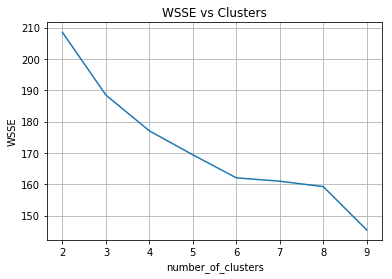

In [41]:
plt.plot(kmeans_out.index, kmeans_out.wsse)
plt.xlabel('number_of_clusters')
plt.ylabel('WSSE')
plt.title('WSSE vs Clusters')
plt.grid(True)
plt.show()

### Look at predicted cluster membership

In [42]:
preds = clusters.predict(fido_parsed).collect()

In [44]:
from collections import Counter
pred_count_by_cluster = Counter(preds)
pred_count_by_cluster

Counter({6: 228, 7: 209, 8: 73, 0: 152, 3: 120, 5: 59, 1: 43, 2: 37, 4: 6})

In [47]:
tickers_and_predclus = pd.DataFrame({'ticker' : tickers, 'cluster' : preds})

In [48]:
tickers_and_predclus.head(10)

,ticker,cluster
0,FSCEX,6
1,FSCBX,6
2,FSCIX,6
3,FDGIX,6
4,FADBX,6
5,FADAX,6
6,FDGTX,6
7,FSFCX,7
8,FAMUX,7
9,FNBCX,7


#### In practice we would add information about fund to understand cluster composition  
Here we select some funds in the various clusters

cluster 1: Fidelity Advisor Small Cap C (FSCEX)  
cluster 1: Fidelity Advisor Small Cap B (FSCBX)  
cluster 2: Fidelity Advisor Dividend Growth I (FDGIX)  
cluster 0: Fidelity Advisor Municipal Income A (FAMUX)

It appears cluster 1 may hold riskier stocks, cluster 2 less risky stocks, and cluster 0 bonds